In [2]:
# stdlib
import math, sys, importlib
    
# packages
import numpy as np
from numpy import sqrt, pi
import matplotlib.pyplot as plt
from scipy import interpolate as interp
from scipy.integrate import quad, odeint
import scipy.constants as c

# local modules
from config import model
import g_star
from util import *

## Find a good Interpolator

In [ ]:
def test_interpolator(interpolator):
    g_rho_interp = interpolator(g_star.T, g_star.g_rho_paper)
    g_s_interp = interpolator(g_star.T, g_star.g_s_paper)
    #plt.figure(figsize=(10, 5))
    N = 400
    T = np.logspace(np.log10(np.min(g_star.T)), np.log10(np.max(g_star.T)), N)
    
    plt.semilogx(T, g_rho_interp(T), "-b", label=r"$g_\rho$ Interpolated")
    plt.semilogx(T, g_s_interp(T), "--r", label=r"$g_\rho$ Interpolated")
    
    plt.semilogx(g_star.T, g_star.g_rho_paper, "*b", label=r"$g_\rho$ Data")
    plt.semilogx(g_star.T, g_star.g_s_paper, "+r", label=r"$g_s$ Data")

    plt.legend()
    plt.grid()
    plt.xlabel("T / eV")
    plt.ylabel("g")
    
    return g_rho_interp, g_s_interp

In [ ]:
test_interpolator(interp.CubicSpline) # too many bumps

In [ ]:
test_interpolator(interp.interp1d) # no derivative

In [ ]:
test_interpolator(interp.Akima1DInterpolator) # ok, little bump at the end

In [ ]:
test_interpolator(interp.BarycentricInterpolator) # oh

In [ ]:
test_interpolator(interp.KroghInterpolator) # ooooh

In [ ]:
# ok, this one also uses cubic splines but only monotonic ones, therefore there are no bunmps
test_interpolator(interp.PchipInterpolator) 
plt.savefig("Plots/g_plot.pdf")

In [ ]:
# float(g_rho_interp.derivative()(1e9)) # how to get the derivative

### Fix g_star data

Text(0.5,0,'T [MeV]')

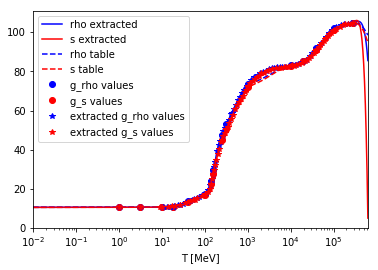

In [11]:
lower_pow = -2
upper_pow = 5.8
T = np.logspace(lower_pow, upper_pow, 400) *  1e6
plt.semilogx(T / 1e6, g_star.borsamyi_table.g_rho(T), "-", color="blue", label="rho extracted")
plt.semilogx(T / 1e6, g_star.borsamyi_table.g_s(T), "-", color="red", label="s extracted")
plt.semilogx(T / 1e6, g_star.borsamyi_paper_table.g_rho(T), "--", color="blue", label="rho table")
plt.semilogx(T / 1e6, g_star.borsamyi_paper_table.g_s(T), "--", color="red", label="s table")
plt.semilogx(g_star.T / 1e6, g_star.g_rho_paper, "o", color="blue", label="g_rho values")
plt.semilogx(g_star.T / 1e6, g_star.g_s_paper, "o", color="red", label="g_s values")
plt.semilogx(g_star.T_g_rho / 1e6, g_star.g_rho, "*", color="blue", label="extracted g_rho values")
plt.semilogx(g_star.T_g_s / 1e6, g_star.g_s, "*", color="red", label="extracted g_s values")
plt.legend()
plt.xlim(10**lower_pow, 10**upper_pow)
#plt.ylim(0, 40)
plt.xlabel("T [MeV]")